In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm, linregress

import os
import time
import itertools

from nsm.mse_model import *

from sklearn.model_selection import KFold

np.random.seed(12345)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# import file names
files = os.listdir("data/")
files = [f for f in files if "processed" in f]
files

['EXP0019_MS001_processed.csv',
 'EXP0019_MS014_processed.csv',
 'EXP0019_MS008_processed.csv',
 'EXP0019_DSM27147_processed.csv']

# Function to make predictions on test data

In [3]:
def predict_df(model, df, species, inputs):
    
    # save measured and predicted values
    pred_species = []
    pred = []
    stdv = []
    true = []

    # pull just the community data
    test_data = process_df(df, species, inputs) 

    # plot the results
    for exp, t_span, Y_m, inputs in test_data:

        # increase evaluation time
        t_eval = np.linspace(t_span[0], t_span[-1])

        # predict 
        Y_p, Y_std, _ = model.predict(Y_m, t_eval, inputs)
        
        # set NaN to zero
        Y_p = np.nan_to_num(Y_p)
        Y_std = np.nan_to_num(Y_std)

        ### append only end-point prediction results for non-zero outcomes ###
        inds_pos = Y_m[-1,:] > 0 
        pred_species.append(np.array(species)[inds_pos])
        true.append(Y_m[-1,:][inds_pos])
        pred.append(Y_p[-1,:][inds_pos])
        stdv.append(Y_std[-1,:][inds_pos])
        
    # concatenate list
    pred_species = np.concatenate(pred_species)
    true = np.concatenate(true)
    pred = np.concatenate(pred)
    stdv = np.concatenate(stdv)
        
    return pred_species, true, pred, stdv

Total samples: 60, Updated regularization: 1.00e-03
Loss: 38.274, Residuals: -1.897
Loss: 21.641, Residuals: -0.999
Loss: 13.488, Residuals: -0.625
Loss: 11.341, Residuals: -0.311
Loss: 9.591, Residuals: -0.285
Loss: 8.421, Residuals: -0.322
Loss: 8.230, Residuals: -0.181
Loss: 7.006, Residuals: -0.325
Loss: 6.745, Residuals: -0.161
Loss: 6.300, Residuals: -0.165
Loss: 5.856, Residuals: -0.202
Loss: 5.704, Residuals: -0.132
Optimization terminated successfully.
Evidence -227.330
Updating precision...
Total samples: 60, Updated regularization: 1.65e-03
Loss: 27.989, Residuals: -0.066
Loss: 25.212, Residuals: -0.050
Loss: 24.969, Residuals: -0.024
Loss: 22.921, Residuals: -0.049
Loss: 22.638, Residuals: -0.037
Optimization terminated successfully.
Evidence 129.000
Updating precision...
Total samples: 60, Updated regularization: 2.53e-03
Loss: 62.688, Residuals: -0.045
Loss: 62.503, Residuals: -0.029
Optimization terminated successfully.
Evidence 361.167
Updating precision...
Total sample

Total samples: 62, Updated regularization: 9.92e-03
Loss: 223.136, Residuals: 0.004
Loss: 220.918, Residuals: -0.001
Loss: 204.839, Residuals: -0.001
Loss: 203.770, Residuals: 0.000
Optimization terminated successfully.
Evidence 801.490
Updating precision...
Total samples: 62, Updated regularization: 1.14e-02
Loss: 219.816, Residuals: -0.004
Loss: 217.031, Residuals: -0.003
Loss: 211.748, Residuals: -0.005
Loss: 211.707, Residuals: -0.002
Optimization terminated successfully.
Evidence 820.562
Updating precision...
Total samples: 62, Updated regularization: 1.31e-02
Loss: 218.297, Residuals: -0.010
Loss: 217.569, Residuals: -0.002
Optimization terminated successfully.
Evidence 830.550
Updating precision...
Total samples: 62, Updated regularization: 1.50e-02
Loss: 228.971, Residuals: -0.001
Optimization terminated successfully.
Evidence 836.071
Pass count  1
Total samples: 62, Updated regularization: 1.00e-03
Loss: 67.598, Residuals: -2.237
Loss: 65.088, Residuals: -1.897
Loss: 40.495, R

Loss: 24.062, Residuals: -0.056
Optimization terminated successfully.
Evidence 178.130
Updating precision...
Total samples: 59, Updated regularization: 2.11e-03
Loss: 77.603, Residuals: -0.060
Loss: 76.857, Residuals: -0.036
Optimization terminated successfully.
Evidence 407.930
Updating precision...
Total samples: 59, Updated regularization: 2.67e-03
Loss: 126.910, Residuals: -0.041
Loss: 125.701, Residuals: -0.062
Loss: 121.206, Residuals: -0.052
Loss: 120.500, Residuals: -0.063
Optimization terminated successfully.
Evidence 522.958
Updating precision...
Total samples: 59, Updated regularization: 3.21e-03
Loss: 157.888, Residuals: -0.062
Loss: 157.256, Residuals: -0.063
Optimization terminated successfully.
Evidence 583.242
Updating precision...
Total samples: 59, Updated regularization: 3.74e-03
Loss: 176.770, Residuals: -0.073
Loss: 176.171, Residuals: -0.067
Optimization terminated successfully.
Evidence 622.775
Updating precision...
Total samples: 59, Updated regularization: 4.27

Loss: 213.836, Residuals: -0.024
Loss: 202.157, Residuals: -0.050
Loss: 200.869, Residuals: -0.042
Optimization terminated successfully.
Evidence 750.203
Updating precision...
Total samples: 60, Updated regularization: 1.46e-02
Loss: 217.310, Residuals: -0.027
Loss: 215.826, Residuals: -0.031
Loss: 209.542, Residuals: -0.036
Loss: 208.233, Residuals: -0.028
Optimization terminated successfully.
Evidence 767.096
Updating precision...
Total samples: 60, Updated regularization: 1.59e-02
Loss: 217.388, Residuals: -0.029
Loss: 216.706, Residuals: -0.027
Optimization terminated successfully.
Evidence 775.324
Updating precision...
Total samples: 60, Updated regularization: 1.71e-02
Loss: 225.770, Residuals: -0.025
Optimization terminated successfully.
Evidence 779.393
Pass count  1
Total samples: 59, Updated regularization: 1.00e-03
Loss: 30.965, Residuals: -1.121
Loss: 25.960, Residuals: -0.880
Loss: 14.624, Residuals: -0.681
Loss: 11.486, Residuals: -0.507
Loss: 9.643, Residuals: -0.452
Los

Total samples: 60, Updated regularization: 6.75e-03
Loss: 196.148, Residuals: -0.038
Loss: 195.352, Residuals: -0.030
Optimization terminated successfully.
Evidence 710.780
Updating precision...
Total samples: 60, Updated regularization: 7.76e-03
Loss: 208.413, Residuals: 0.009
Loss: 199.321, Residuals: 0.003
Loss: 199.182, Residuals: 0.007
Optimization terminated successfully.
Evidence 730.321
Updating precision...
Total samples: 60, Updated regularization: 8.79e-03
Loss: 207.526, Residuals: -0.018
Loss: 206.232, Residuals: -0.017
Optimization terminated successfully.
Evidence 746.871
Updating precision...
Total samples: 60, Updated regularization: 9.83e-03
Loss: 220.069, Residuals: -0.009
Optimization terminated successfully.
Evidence 756.315
Updating precision...
Total samples: 60, Updated regularization: 1.08e-02
Loss: 218.372, Residuals: 0.008
Loss: 208.531, Residuals: -0.011
Loss: 208.116, Residuals: -0.004
Optimization terminated successfully.
Evidence 771.126
Updating precision

Evidence 807.613
Pass count  1
Total samples: 62, Updated regularization: 1.00e-03
Loss: 27.267, Residuals: -1.104
Loss: 21.333, Residuals: -0.980
Loss: 12.889, Residuals: -0.762
Loss: 10.843, Residuals: -0.323
Loss: 8.913, Residuals: -0.345
Loss: 7.953, Residuals: -0.372
Loss: 7.789, Residuals: -0.293
Loss: 7.478, Residuals: -0.289
Loss: 6.978, Residuals: -0.298
Loss: 6.729, Residuals: -0.297
Loss: 6.635, Residuals: -0.199
Loss: 6.464, Residuals: -0.206
Loss: 6.384, Residuals: -0.205
Loss: 6.350, Residuals: -0.199
Optimization terminated successfully.
Evidence -188.551
Updating precision...
Total samples: 62, Updated regularization: 1.45e-03
Loss: 36.524, Residuals: -0.198
Loss: 36.381, Residuals: -0.183
Optimization terminated successfully.
Evidence 236.708
Updating precision...
Total samples: 62, Updated regularization: 1.94e-03
Loss: 107.329, Residuals: -0.186
Loss: 105.986, Residuals: -0.169
Loss: 99.347, Residuals: -0.214
Loss: 97.626, Residuals: -0.156
Optimization terminated su

Total samples: 60, Updated regularization: 5.49e-03
Loss: 221.488, Residuals: -0.081
Optimization terminated successfully.
Evidence 703.245
Pass count  1
Total samples: 62, Updated regularization: 1.00e-03
Loss: 43.753, Residuals: -0.973
Loss: 22.546, Residuals: -1.027
Loss: 15.338, Residuals: -0.812
Loss: 12.139, Residuals: -0.458
Loss: 9.967, Residuals: -0.412
Loss: 9.593, Residuals: -0.386
Loss: 8.975, Residuals: -0.366
Loss: 8.475, Residuals: -0.263
Loss: 8.178, Residuals: -0.226
Loss: 7.618, Residuals: -0.254
Loss: 7.275, Residuals: -0.258
Loss: 7.066, Residuals: -0.178
Loss: 6.736, Residuals: -0.211
Loss: 6.673, Residuals: -0.134
Loss: 6.551, Residuals: -0.140
Loss: 6.345, Residuals: -0.158
Loss: 6.325, Residuals: -0.130
Optimization terminated successfully.
Evidence -157.390
Updating precision...
Total samples: 62, Updated regularization: 1.32e-03
Loss: 42.056, Residuals: -0.114
Loss: 41.250, Residuals: -0.093
Loss: 41.076, Residuals: -0.100
Loss: 40.142, Residuals: -0.067
Loss:

Loss: 160.214, Residuals: -0.031
Loss: 159.703, Residuals: -0.022
Optimization terminated successfully.
Evidence 653.207
Updating precision...
Total samples: 61, Updated regularization: 5.30e-03
Loss: 179.718, Residuals: -0.012
Loss: 179.087, Residuals: -0.013
Optimization terminated successfully.
Evidence 699.407
Updating precision...
Total samples: 61, Updated regularization: 6.15e-03
Loss: 198.745, Residuals: -0.024
Loss: 198.358, Residuals: -0.021
Optimization terminated successfully.
Evidence 724.983
Updating precision...
Total samples: 61, Updated regularization: 7.17e-03
Loss: 213.582, Residuals: -0.006
Loss: 213.366, Residuals: -0.006
Optimization terminated successfully.
Evidence 737.675
Updating precision...
Total samples: 61, Updated regularization: 8.30e-03
Loss: 222.624, Residuals: -0.008
Optimization terminated successfully.
Evidence 742.240
Pass count  1
Total samples: 62, Updated regularization: 1.00e-03
Loss: 31.470, Residuals: -1.197
Loss: 22.850, Residuals: -0.930
Lo

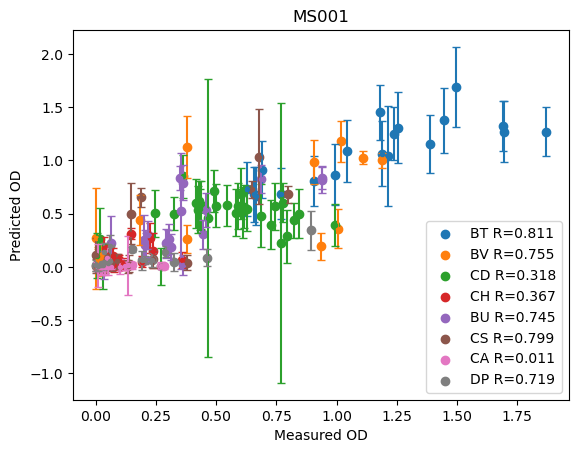

Total samples: 41, Updated regularization: 1.00e-03
Loss: 44.138, Residuals: -2.145
Loss: 42.596, Residuals: -1.810
Loss: 19.222, Residuals: -1.375
Loss: 13.437, Residuals: -0.836
Loss: 10.748, Residuals: -0.688
Loss: 9.977, Residuals: -0.647
Loss: 6.164, Residuals: -0.618
Loss: 5.033, Residuals: -0.174
Loss: 4.760, Residuals: -0.105
Loss: 4.612, Residuals: -0.153
Loss: 4.337, Residuals: -0.147
Loss: 3.880, Residuals: -0.146
Loss: 3.538, Residuals: -0.158
Loss: 3.250, Residuals: -0.137
Loss: 3.058, Residuals: -0.143
Loss: 2.781, Residuals: -0.170
Loss: 2.735, Residuals: -0.121
Loss: 2.651, Residuals: -0.121
Loss: 2.600, Residuals: -0.114
Loss: 2.506, Residuals: -0.107
Loss: 2.374, Residuals: -0.095
Loss: 2.339, Residuals: -0.090
Loss: 2.166, Residuals: -0.082
Loss: 2.129, Residuals: -0.095
Loss: 2.056, Residuals: -0.094
Loss: 1.996, Residuals: -0.083
Loss: 1.968, Residuals: -0.074
Loss: 1.851, Residuals: -0.094
Loss: 1.835, Residuals: -0.080
Optimization terminated successfully.
Eviden

Total samples: 42, Updated regularization: 3.82e-03
Loss: 71.570, Residuals: -0.095
Loss: 71.339, Residuals: -0.082
Optimization terminated successfully.
Evidence 336.149
Updating precision...
Total samples: 42, Updated regularization: 5.03e-03
Loss: 92.632, Residuals: -0.072
Loss: 91.779, Residuals: -0.056
Optimization terminated successfully.
Evidence 373.018
Updating precision...
Total samples: 42, Updated regularization: 6.49e-03
Loss: 105.531, Residuals: -0.053
Loss: 104.964, Residuals: -0.034
Optimization terminated successfully.
Evidence 413.861
Updating precision...
Total samples: 42, Updated regularization: 8.06e-03
Loss: 111.553, Residuals: -0.060
Loss: 111.021, Residuals: -0.051
Optimization terminated successfully.
Evidence 443.893
Updating precision...
Total samples: 42, Updated regularization: 9.94e-03
Loss: 123.392, Residuals: -0.036
Loss: 122.457, Residuals: -0.028
Optimization terminated successfully.
Evidence 464.290
Updating precision...
Total samples: 42, Updated re

Loss: 134.604, Residuals: -0.068
Loss: 134.300, Residuals: -0.062
Optimization terminated successfully.
Evidence 507.963
Updating precision...
Total samples: 42, Updated regularization: 1.33e-02
Loss: 137.859, Residuals: -0.071
Loss: 137.586, Residuals: -0.068
Optimization terminated successfully.
Evidence 517.771
Updating precision...
Total samples: 42, Updated regularization: 1.58e-02
Loss: 146.695, Residuals: -0.065
Loss: 139.364, Residuals: -0.070
Loss: 138.927, Residuals: -0.066
Optimization terminated successfully.
Evidence 529.184
Updating precision...
Total samples: 42, Updated regularization: 1.84e-02
Loss: 148.792, Residuals: -0.064
Optimization terminated successfully.
Evidence 534.901
Updating precision...
Total samples: 42, Updated regularization: 2.12e-02
Loss: 151.146, Residuals: -0.058
Loss: 151.065, Residuals: -0.057
Optimization terminated successfully.
Evidence 539.247
Pass count  1
Total samples: 40, Updated regularization: 1.00e-03
Loss: 17.934, Residuals: -0.963
L

Evidence -186.680
Updating precision...
Total samples: 41, Updated regularization: 1.56e-03
Loss: 11.433, Residuals: -0.108
Loss: 11.341, Residuals: -0.087
Optimization terminated successfully.
Evidence 1.336
Updating precision...
Total samples: 41, Updated regularization: 2.17e-03
Loss: 26.639, Residuals: -0.123
Loss: 26.368, Residuals: -0.101
Optimization terminated successfully.
Evidence 142.039
Updating precision...
Total samples: 41, Updated regularization: 2.85e-03
Loss: 49.388, Residuals: -0.115
Loss: 48.844, Residuals: -0.082
Loss: 47.852, Residuals: -0.084
Loss: 44.429, Residuals: -0.092
Loss: 44.066, Residuals: -0.078
Optimization terminated successfully.
Evidence 227.237
Updating precision...
Total samples: 41, Updated regularization: 3.52e-03
Loss: 66.052, Residuals: -0.091
Loss: 65.019, Residuals: -0.076
Optimization terminated successfully.
Evidence 304.431
Updating precision...
Total samples: 41, Updated regularization: 4.09e-03
Loss: 86.708, Residuals: -0.088
Loss: 79.7

Loss: 123.590, Residuals: -0.034
Loss: 111.826, Residuals: -0.077
Loss: 110.227, Residuals: -0.075
Optimization terminated successfully.
Evidence 483.883
Updating precision...
Total samples: 42, Updated regularization: 6.42e-03
Loss: 129.501, Residuals: -0.039
Optimization terminated successfully.
Evidence 504.992
Updating precision...
Total samples: 42, Updated regularization: 7.22e-03
Loss: 138.864, Residuals: -0.039
Loss: 138.166, Residuals: -0.029
Loss: 132.388, Residuals: -0.037
Loss: 132.050, Residuals: -0.039
Optimization terminated successfully.
Evidence 518.220
Updating precision...
Total samples: 42, Updated regularization: 8.01e-03
Loss: 144.054, Residuals: -0.039
Optimization terminated successfully.
Evidence 527.289
Updating precision...
Total samples: 42, Updated regularization: 8.75e-03
Loss: 150.776, Residuals: -0.032
Optimization terminated successfully.
Evidence 531.947
Pass count  1
Total samples: 41, Updated regularization: 1.00e-03
Loss: 20.478, Residuals: -1.227
L

Total samples: 41, Updated regularization: 2.66e-03
Loss: 95.941, Residuals: -0.381
Loss: 95.533, Residuals: -0.368
Optimization terminated successfully.
Evidence 292.181
Updating precision...
Total samples: 41, Updated regularization: 3.09e-03
Loss: 91.842, Residuals: -0.336
Loss: 89.448, Residuals: -0.282
Loss: 85.653, Residuals: -0.230
Loss: 79.335, Residuals: -0.194
Loss: 79.206, Residuals: -0.189
Optimization terminated successfully.
Evidence 316.248
Updating precision...
Total samples: 41, Updated regularization: 3.69e-03
Loss: 102.199, Residuals: -0.181
Loss: 96.738, Residuals: -0.165
Loss: 96.629, Residuals: -0.161
Optimization terminated successfully.
Evidence 366.698
Updating precision...
Total samples: 41, Updated regularization: 4.22e-03
Loss: 115.355, Residuals: -0.164
Optimization terminated successfully.
Evidence 397.927
Updating precision...
Total samples: 41, Updated regularization: 4.74e-03
Loss: 120.852, Residuals: -0.167
Loss: 120.579, Residuals: -0.162
Optimization

Loss: 149.702, Residuals: -0.061
Optimization terminated successfully.
Evidence 510.122
Updating precision...
Total samples: 43, Updated regularization: 1.15e-02
Loss: 141.938, Residuals: -0.076
Loss: 140.319, Residuals: -0.055
Optimization terminated successfully.
Evidence 521.148
Updating precision...
Total samples: 43, Updated regularization: 1.33e-02
Loss: 149.437, Residuals: -0.063
Optimization terminated successfully.
Evidence 529.882
Updating precision...
Total samples: 43, Updated regularization: 1.51e-02
Loss: 154.012, Residuals: -0.057
Loss: 152.037, Residuals: -0.058
Loss: 149.116, Residuals: -0.057
Loss: 148.979, Residuals: -0.050
Optimization terminated successfully.
Evidence 536.639
Updating precision...
Total samples: 43, Updated regularization: 1.71e-02
Loss: 154.108, Residuals: -0.052
Loss: 154.061, Residuals: -0.051
Optimization terminated successfully.
Evidence 540.165
Pass count  1
Total samples: 41, Updated regularization: 1.00e-03
Loss: 24.737, Residuals: -1.010
L

Loss: 55.687, Residuals: -0.030
Loss: 55.281, Residuals: -0.019
Loss: 51.883, Residuals: -0.036
Loss: 51.551, Residuals: -0.029
Optimization terminated successfully.
Evidence 342.683
Updating precision...
Total samples: 43, Updated regularization: 5.39e-03
Loss: 79.600, Residuals: -0.021
Optimization terminated successfully.
Evidence 417.940
Updating precision...
Total samples: 43, Updated regularization: 6.61e-03
Loss: 101.815, Residuals: -0.026
Loss: 101.749, Residuals: -0.024
Optimization terminated successfully.
Evidence 460.828
Updating precision...
Total samples: 43, Updated regularization: 8.00e-03
Loss: 116.591, Residuals: -0.035
Loss: 114.104, Residuals: -0.028
Optimization terminated successfully.
Evidence 489.588
Updating precision...
Total samples: 43, Updated regularization: 9.67e-03
Loss: 130.575, Residuals: -0.010
Loss: 123.094, Residuals: -0.020
Loss: 122.171, Residuals: -0.014
Optimization terminated successfully.
Evidence 507.974
Updating precision...
Total samples: 4

Loss: 144.003, Residuals: -0.060
Optimization terminated successfully.
Evidence 542.413
Updating precision...
Total samples: 43, Updated regularization: 6.75e-03
Loss: 151.335, Residuals: -0.049
Optimization terminated successfully.
Evidence 548.342
Updating precision...
Total samples: 43, Updated regularization: 7.29e-03
Loss: 151.256, Residuals: -0.052
Loss: 151.057, Residuals: -0.050
Optimization terminated successfully.
Evidence 551.507
Pass count  1


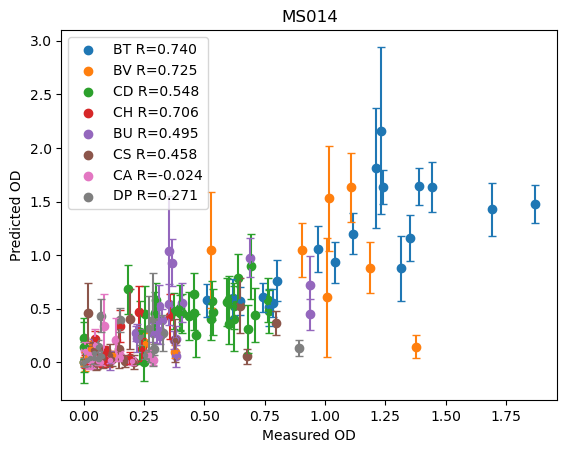

Total samples: 60, Updated regularization: 1.00e-03
Loss: 50.239, Residuals: -1.405
Loss: 22.384, Residuals: -1.288
Loss: 18.702, Residuals: -0.616
Loss: 13.422, Residuals: -0.544
Loss: 10.539, Residuals: -0.475
Loss: 9.327, Residuals: -0.231
Loss: 8.920, Residuals: -0.313
Loss: 8.206, Residuals: -0.325
Loss: 7.906, Residuals: -0.195
Loss: 7.398, Residuals: -0.218
Loss: 7.255, Residuals: -0.221
Loss: 6.980, Residuals: -0.221
Loss: 6.837, Residuals: -0.137
Loss: 6.605, Residuals: -0.159
Loss: 6.547, Residuals: -0.152
Optimization terminated successfully.
Evidence -194.290
Updating precision...
Total samples: 60, Updated regularization: 1.51e-03
Loss: 32.533, Residuals: -0.176
Loss: 32.258, Residuals: -0.145
Optimization terminated successfully.
Evidence 188.306
Updating precision...
Total samples: 60, Updated regularization: 2.11e-03
Loss: 86.048, Residuals: -0.179
Loss: 85.096, Residuals: -0.118
Loss: 83.377, Residuals: -0.113
Loss: 73.829, Residuals: -0.086
Loss: 72.497, Residuals: -0

Loss: 194.379, Residuals: -0.040
Loss: 193.486, Residuals: -0.041
Optimization terminated successfully.
Evidence 736.233
Updating precision...
Total samples: 62, Updated regularization: 4.78e-03
Loss: 213.114, Residuals: -0.047
Optimization terminated successfully.
Evidence 752.267
Updating precision...
Total samples: 62, Updated regularization: 5.18e-03
Loss: 216.210, Residuals: -0.045
Loss: 215.779, Residuals: -0.045
Optimization terminated successfully.
Evidence 765.049
Updating precision...
Total samples: 62, Updated regularization: 5.57e-03
Loss: 223.204, Residuals: -0.038
Loss: 214.494, Residuals: -0.035
Loss: 213.674, Residuals: -0.035
Optimization terminated successfully.
Evidence 778.082
Updating precision...
Total samples: 62, Updated regularization: 5.98e-03
Loss: 225.232, Residuals: -0.031
Optimization terminated successfully.
Evidence 785.967
Updating precision...
Total samples: 62, Updated regularization: 6.36e-03
Loss: 225.623, Residuals: -0.029
Loss: 225.329, Residuals:

Evidence 564.723
Updating precision...
Total samples: 59, Updated regularization: 4.47e-03
Loss: 170.221, Residuals: -0.076
Loss: 168.667, Residuals: -0.066
Loss: 161.175, Residuals: -0.049
Loss: 157.888, Residuals: -0.038
Optimization terminated successfully.
Evidence 613.229
Updating precision...
Total samples: 59, Updated regularization: 5.44e-03
Loss: 185.595, Residuals: -0.046
Optimization terminated successfully.
Evidence 646.527
Updating precision...
Total samples: 59, Updated regularization: 6.51e-03
Loss: 199.841, Residuals: -0.043
Loss: 193.468, Residuals: -0.038
Loss: 193.231, Residuals: -0.042
Optimization terminated successfully.
Evidence 667.699
Updating precision...
Total samples: 59, Updated regularization: 7.67e-03
Loss: 206.636, Residuals: -0.045
Optimization terminated successfully.
Evidence 679.395
Updating precision...
Total samples: 59, Updated regularization: 8.95e-03
Loss: 206.625, Residuals: -0.032
Loss: 205.838, Residuals: -0.039
Optimization terminated succes

Loss: 16.163, Residuals: -0.854
Loss: 11.375, Residuals: -0.581
Loss: 9.379, Residuals: -0.362
Loss: 8.707, Residuals: -0.360
Loss: 8.273, Residuals: -0.375
Loss: 8.117, Residuals: -0.232
Loss: 7.816, Residuals: -0.240
Loss: 7.390, Residuals: -0.286
Loss: 7.275, Residuals: -0.258
Optimization terminated successfully.
Evidence -181.603
Updating precision...
Total samples: 59, Updated regularization: 1.44e-03
Loss: 34.530, Residuals: -0.297
Loss: 33.896, Residuals: -0.166
Loss: 30.692, Residuals: -0.228
Loss: 29.875, Residuals: -0.155
Loss: 28.733, Residuals: -0.117
Loss: 27.221, Residuals: -0.104
Loss: 26.816, Residuals: -0.115
Optimization terminated successfully.
Evidence 179.823
Updating precision...
Total samples: 59, Updated regularization: 1.99e-03
Loss: 83.597, Residuals: -0.114
Loss: 82.700, Residuals: -0.082
Loss: 78.728, Residuals: -0.100
Loss: 78.011, Residuals: -0.102
Optimization terminated successfully.
Evidence 401.057
Updating precision...
Total samples: 59, Updated regu

Evidence 559.781
Updating precision...
Total samples: 60, Updated regularization: 3.32e-03
Loss: 148.788, Residuals: -0.050
Loss: 148.367, Residuals: -0.036
Optimization terminated successfully.
Evidence 639.144
Updating precision...
Total samples: 60, Updated regularization: 3.96e-03
Loss: 174.058, Residuals: -0.053
Loss: 173.522, Residuals: -0.041
Optimization terminated successfully.
Evidence 679.362
Updating precision...
Total samples: 60, Updated regularization: 4.69e-03
Loss: 196.959, Residuals: -0.038
Optimization terminated successfully.
Evidence 705.507
Updating precision...
Total samples: 60, Updated regularization: 5.43e-03
Loss: 199.471, Residuals: -0.046
Loss: 199.035, Residuals: -0.038
Optimization terminated successfully.
Evidence 731.247
Updating precision...
Total samples: 60, Updated regularization: 6.20e-03
Loss: 213.822, Residuals: -0.036
Optimization terminated successfully.
Evidence 741.580
Updating precision...
Total samples: 60, Updated regularization: 6.98e-03


Loss: 5.068, Residuals: -0.144
Loss: 5.048, Residuals: -0.115
Optimization terminated successfully.
Evidence -252.284
Updating precision...
Total samples: 62, Updated regularization: 1.76e-03
Loss: 21.341, Residuals: -0.139
Loss: 21.100, Residuals: -0.085
Loss: 19.692, Residuals: -0.083
Loss: 19.474, Residuals: -0.089
Optimization terminated successfully.
Evidence 114.648
Updating precision...
Total samples: 62, Updated regularization: 2.68e-03
Loss: 62.385, Residuals: -0.060
Loss: 60.121, Residuals: -0.098
Loss: 59.991, Residuals: -0.084
Loss: 57.173, Residuals: -0.095
Loss: 56.808, Residuals: -0.071
Optimization terminated successfully.
Evidence 360.703
Updating precision...
Total samples: 62, Updated regularization: 3.84e-03
Loss: 96.303, Residuals: -0.063
Loss: 95.188, Residuals: -0.064
Loss: 90.660, Residuals: -0.073
Loss: 90.045, Residuals: -0.058
Optimization terminated successfully.
Evidence 521.714
Updating precision...
Total samples: 62, Updated regularization: 5.33e-03
Loss:

Evidence 730.779
Updating precision...
Total samples: 60, Updated regularization: 7.86e-03
Loss: 216.445, Residuals: -0.034
Loss: 215.431, Residuals: -0.028
Optimization terminated successfully.
Evidence 742.435
Updating precision...
Total samples: 60, Updated regularization: 8.63e-03
Loss: 224.997, Residuals: -0.029
Optimization terminated successfully.
Evidence 747.414
Pass count  1
Total samples: 62, Updated regularization: 1.00e-03
Loss: 37.990, Residuals: -0.877
Loss: 27.345, Residuals: -0.599
Loss: 17.978, Residuals: -0.416
Loss: 14.263, Residuals: -0.444
Loss: 11.427, Residuals: -0.475
Loss: 11.021, Residuals: -0.394
Loss: 10.298, Residuals: -0.373
Loss: 9.717, Residuals: -0.333
Loss: 8.736, Residuals: -0.346
Loss: 8.617, Residuals: -0.307
Loss: 7.861, Residuals: -0.368
Loss: 7.668, Residuals: -0.217
Loss: 7.293, Residuals: -0.214
Loss: 6.763, Residuals: -0.233
Loss: 6.519, Residuals: -0.108
Loss: 5.610, Residuals: -0.092
Loss: 5.125, Residuals: -0.105
Loss: 5.051, Residuals: -0

Loss: 199.321, Residuals: -0.031
Loss: 198.426, Residuals: -0.038
Optimization terminated successfully.
Evidence 690.703
Updating precision...
Total samples: 61, Updated regularization: 8.04e-03
Loss: 208.605, Residuals: -0.045
Loss: 208.372, Residuals: -0.039
Optimization terminated successfully.
Evidence 704.959
Updating precision...
Total samples: 61, Updated regularization: 9.21e-03
Loss: 218.862, Residuals: -0.040
Optimization terminated successfully.
Evidence 715.245
Updating precision...
Total samples: 61, Updated regularization: 1.03e-02
Loss: 221.843, Residuals: -0.042
Loss: 217.592, Residuals: -0.046
Loss: 217.336, Residuals: -0.050
Optimization terminated successfully.
Evidence 723.510
Updating precision...
Total samples: 61, Updated regularization: 1.15e-02
Loss: 225.682, Residuals: -0.047
Optimization terminated successfully.
Evidence 728.355
Pass count  1
Total samples: 62, Updated regularization: 1.00e-03
Loss: 32.258, Residuals: -0.844
Loss: 22.450, Residuals: -1.008
Lo

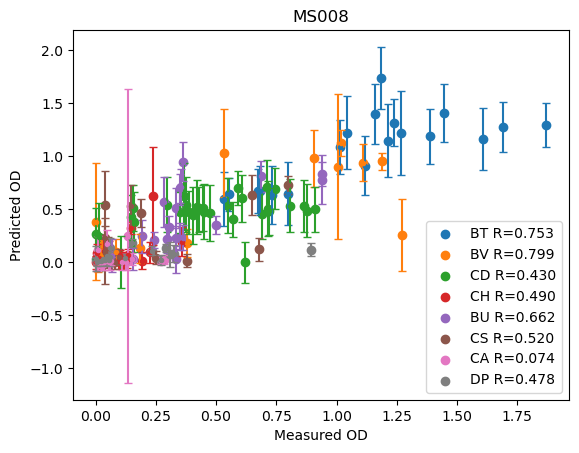

Total samples: 60, Updated regularization: 1.00e-03
Loss: 27.975, Residuals: -1.377
Loss: 21.316, Residuals: -1.042
Loss: 19.370, Residuals: -0.975
Loss: 15.247, Residuals: -0.850
Loss: 11.667, Residuals: -0.513
Loss: 10.438, Residuals: -0.292
Loss: 8.691, Residuals: -0.388
Loss: 8.398, Residuals: -0.342
Loss: 7.887, Residuals: -0.324
Loss: 7.298, Residuals: -0.403
Loss: 6.973, Residuals: -0.207
Loss: 6.329, Residuals: -0.201
Loss: 5.967, Residuals: -0.156
Loss: 5.810, Residuals: -0.139
Loss: 5.576, Residuals: -0.127
Loss: 5.476, Residuals: -0.135
Loss: 5.300, Residuals: -0.131
Loss: 5.281, Residuals: -0.095
Optimization terminated successfully.
Evidence -226.506
Updating precision...
Total samples: 60, Updated regularization: 1.66e-03
Loss: 25.382, Residuals: -0.101
Loss: 25.106, Residuals: -0.081
Loss: 24.063, Residuals: -0.082
Loss: 22.519, Residuals: -0.103
Loss: 22.372, Residuals: -0.066
Loss: 21.473, Residuals: -0.128
Loss: 21.232, Residuals: -0.134
Optimization terminated succes

Evidence 710.820
Updating precision...
Total samples: 62, Updated regularization: 6.85e-03
Loss: 223.869, Residuals: -0.057
Loss: 223.357, Residuals: -0.048
Optimization terminated successfully.
Evidence 720.028
Updating precision...
Total samples: 62, Updated regularization: 7.08e-03
Loss: 226.803, Residuals: -0.055
Loss: 226.446, Residuals: -0.056
Optimization terminated successfully.
Evidence 728.130
Updating precision...
Total samples: 62, Updated regularization: 7.27e-03
Loss: 232.519, Residuals: -0.047
Optimization terminated successfully.
Evidence 731.122
Pass count  1
Total samples: 62, Updated regularization: 1.00e-03
Loss: 32.825, Residuals: -1.179
Loss: 17.722, Residuals: -1.173
Loss: 12.983, Residuals: -0.751
Loss: 10.607, Residuals: -0.610
Loss: 10.172, Residuals: -0.489
Loss: 9.397, Residuals: -0.490
Loss: 8.225, Residuals: -0.447
Loss: 7.928, Residuals: -0.417
Loss: 7.782, Residuals: -0.336
Loss: 7.204, Residuals: -0.375
Loss: 7.139, Residuals: -0.357
Optimization termin

Evidence 573.833
Updating precision...
Total samples: 59, Updated regularization: 4.40e-03
Loss: 181.718, Residuals: -0.091
Loss: 181.114, Residuals: -0.088
Loss: 177.130, Residuals: -0.092
Loss: 176.000, Residuals: -0.096
Optimization terminated successfully.
Evidence 611.603
Updating precision...
Total samples: 59, Updated regularization: 5.04e-03
Loss: 196.903, Residuals: -0.092
Optimization terminated successfully.
Evidence 633.086
Updating precision...
Total samples: 59, Updated regularization: 5.70e-03
Loss: 207.945, Residuals: -0.089
Optimization terminated successfully.
Evidence 644.778
Updating precision...
Total samples: 59, Updated regularization: 6.36e-03
Loss: 212.055, Residuals: -0.090
Loss: 212.025, Residuals: -0.090
Optimization terminated successfully.
Evidence 654.513
Updating precision...
Total samples: 59, Updated regularization: 6.98e-03
Loss: 214.217, Residuals: -0.093
Loss: 213.749, Residuals: -0.095
Optimization terminated successfully.
Evidence 663.571
Updating

Loss: 159.801, Residuals: -0.075
Optimization terminated successfully.
Evidence 554.306
Updating precision...
Total samples: 59, Updated regularization: 4.69e-03
Loss: 175.605, Residuals: -0.079
Loss: 174.729, Residuals: -0.071
Optimization terminated successfully.
Evidence 584.033
Updating precision...
Total samples: 59, Updated regularization: 5.82e-03
Loss: 187.334, Residuals: -0.062
Loss: 186.711, Residuals: -0.067
Optimization terminated successfully.
Evidence 605.564
Updating precision...
Total samples: 59, Updated regularization: 6.95e-03
Loss: 194.234, Residuals: -0.056
Loss: 193.404, Residuals: -0.064
Optimization terminated successfully.
Evidence 622.498
Updating precision...
Total samples: 59, Updated regularization: 8.04e-03
Loss: 195.859, Residuals: -0.054
Loss: 195.318, Residuals: -0.057
Optimization terminated successfully.
Evidence 638.601
Updating precision...
Total samples: 59, Updated regularization: 9.13e-03
Loss: 198.234, Residuals: -0.085
Loss: 196.673, Residuals:

Evidence 795.430
Pass count  1
Total samples: 62, Updated regularization: 1.00e-03
Loss: 67.437, Residuals: -2.432
Loss: 50.637, Residuals: 0.602
Loss: 29.292, Residuals: -0.311
Loss: 21.553, Residuals: -0.862
Loss: 15.583, Residuals: -0.754
Loss: 12.827, Residuals: -0.728
Loss: 12.378, Residuals: -0.499
Loss: 9.232, Residuals: -0.485
Loss: 8.687, Residuals: -0.373
Loss: 8.082, Residuals: -0.381
Loss: 7.694, Residuals: -0.253
Loss: 7.289, Residuals: -0.262
Loss: 7.156, Residuals: -0.198
Loss: 6.858, Residuals: -0.206
Loss: 6.483, Residuals: -0.212
Loss: 6.308, Residuals: -0.150
Loss: 6.253, Residuals: -0.130
Loss: 5.625, Residuals: -0.136
Loss: 5.541, Residuals: -0.096
Loss: 5.416, Residuals: -0.101
Loss: 5.326, Residuals: -0.057
Loss: 5.300, Residuals: -0.089
Loss: 5.252, Residuals: -0.091
Loss: 5.065, Residuals: -0.091
Loss: 5.042, Residuals: -0.088
Optimization terminated successfully.
Evidence -195.009
Updating precision...
Total samples: 62, Updated regularization: 1.48e-03
Loss: 

Evidence 743.200
Updating precision...
Total samples: 62, Updated regularization: 1.19e-02
Loss: 223.387, Residuals: -0.042
Loss: 223.049, Residuals: -0.046
Optimization terminated successfully.
Evidence 750.559
Pass count  1
Total samples: 62, Updated regularization: 1.00e-03
Loss: 34.651, Residuals: -0.896
Loss: 13.911, Residuals: -0.640
Loss: 11.085, Residuals: -0.485
Loss: 9.690, Residuals: -0.318
Loss: 8.700, Residuals: -0.423
Loss: 8.196, Residuals: -0.292
Loss: 7.727, Residuals: -0.317
Loss: 7.572, Residuals: -0.194
Loss: 6.964, Residuals: -0.236
Loss: 6.878, Residuals: -0.142
Loss: 6.512, Residuals: -0.143
Loss: 6.437, Residuals: -0.111
Loss: 6.291, Residuals: -0.113
Loss: 6.040, Residuals: -0.099
Loss: 5.905, Residuals: -0.100
Loss: 5.848, Residuals: -0.102
Loss: 5.744, Residuals: -0.106
Loss: 5.554, Residuals: -0.108
Loss: 5.437, Residuals: -0.123
Loss: 5.428, Residuals: -0.112
Optimization terminated successfully.
Evidence -226.210
Updating precision...
Total samples: 62, Up

Loss: 210.360, Residuals: -0.025
Loss: 199.505, Residuals: -0.066
Loss: 196.798, Residuals: -0.061
Optimization terminated successfully.
Evidence 709.709
Updating precision...
Total samples: 62, Updated regularization: 5.18e-03
Loss: 215.973, Residuals: -0.023
Optimization terminated successfully.
Evidence 724.021
Updating precision...
Total samples: 62, Updated regularization: 5.85e-03
Loss: 216.337, Residuals: -0.034
Loss: 215.756, Residuals: -0.034
Optimization terminated successfully.
Evidence 738.852
Updating precision...
Total samples: 62, Updated regularization: 6.51e-03
Loss: 227.511, Residuals: -0.012
Optimization terminated successfully.
Evidence 744.996
Pass count  1
Total samples: 62, Updated regularization: 1.00e-03
Loss: 29.398, Residuals: -1.198
Loss: 13.651, Residuals: -0.832
Loss: 10.810, Residuals: -0.431
Loss: 9.241, Residuals: -0.472
Loss: 9.045, Residuals: -0.358
Loss: 8.719, Residuals: -0.361
Loss: 8.279, Residuals: -0.428
Loss: 8.055, Residuals: -0.267
Loss: 7.66

Total samples: 62, Updated regularization: 5.91e-03
Loss: 210.381, Residuals: -0.062
Loss: 203.151, Residuals: -0.056
Loss: 201.144, Residuals: -0.046
Optimization terminated successfully.
Evidence 701.639
Updating precision...
Total samples: 62, Updated regularization: 6.74e-03
Loss: 215.801, Residuals: -0.064
Optimization terminated successfully.
Evidence 718.756
Updating precision...
Total samples: 62, Updated regularization: 7.50e-03
Loss: 214.012, Residuals: -0.071
Loss: 213.182, Residuals: -0.063
Optimization terminated successfully.
Evidence 732.514
Updating precision...
Total samples: 62, Updated regularization: 8.29e-03
Loss: 223.443, Residuals: -0.049
Loss: 218.735, Residuals: -0.050
Loss: 212.252, Residuals: -0.061
Loss: 211.478, Residuals: -0.053
Optimization terminated successfully.
Evidence 741.387
Updating precision...
Total samples: 62, Updated regularization: 9.26e-03
Loss: 224.164, Residuals: -0.049
Optimization terminated successfully.
Evidence 751.864
Updating preci

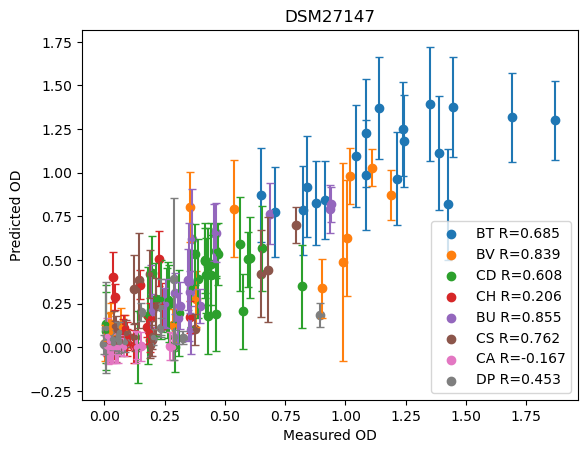

In [4]:
# run kfold for each file 
for file in files:
    
    # import data
    df = pd.read_csv(f"data/{file}")

    # determine species names 
    species = df.columns.values[2:-3]
    inputs  = df.columns.values[-3:]

    # separate mono culture data 
    mono_df = pd.concat([df_i for name, df_i in df.groupby("Treatments") if "Mono" in name])
    dfs = [df_i for name, df_i in df.groupby("Treatments") if "Mono" not in name]

    # init kfold object
    kf = KFold(n_splits=20, shuffle=True, random_state=21)

    # keep track of all predictions
    all_pred_species = []
    all_true = []
    all_pred = []
    all_stdv = []

    # run Kfold 
    # train_index, test_index = next(iter(kf.split(dfs)))
    for train_index, test_index in kf.split(dfs):

        # get train df 
        train_df = pd.concat([dfs[i] for i in train_index])
        train_df = pd.concat((mono_df, train_df))

        # get test df
        test_df = pd.concat([dfs[i] for i in test_index])

        # instantiate gLV fit 
        model = NSM(train_df, species, inputs)

        # fit to data 
        model.fit() 

        # plot fitness to data
        pred_species, true, pred, stdv = predict_df(model, test_df, species, inputs)

        # append predictions 
        all_pred_species = np.append(all_pred_species, pred_species)
        all_true = np.append(all_true, true)
        all_pred = np.append(all_pred, pred)
        all_stdv = np.append(all_stdv, stdv)

        # save prediction results to a .csv
        strain = file.split("_")[1]
        kfold_df = pd.DataFrame()
        kfold_df['species'] = all_pred_species
        kfold_df['true'] = all_true
        kfold_df['pred'] = all_pred
        kfold_df['stdv'] = all_stdv
        kfold_df.to_csv(f"kfold/{strain}_kfold_nsm.csv", index=False)
        
    # show prediction performance of individual species
    for sp in species:
        sp_inds = all_pred_species == sp
        R = linregress(all_true[sp_inds], all_pred[sp_inds]).rvalue
        plt.scatter(all_true[sp_inds], all_pred[sp_inds], label=f"{sp} " + "R={:.3f}".format(R))
        plt.errorbar(all_true[sp_inds], all_pred[sp_inds], yerr=all_stdv[sp_inds], 
                     fmt='.', capsize=3)

    plt.xlabel("Measured OD")
    plt.ylabel("Predicted OD")
    plt.legend()
    plt.title(strain)
    plt.savefig(f"kfold/{strain}_kfold_nsm.pdf", dpi=300)
    plt.show()

In [5]:
# params = np.concatenate([model.r0]+[p.ravel() for p in model.params])

# grad_fwd = model.jacobian_fwd(params)

# grad_adj = model.jacobian_adj(params)

# plt.scatter(np.array(grad_adj), np.array(grad_fwd))
# plt.show()

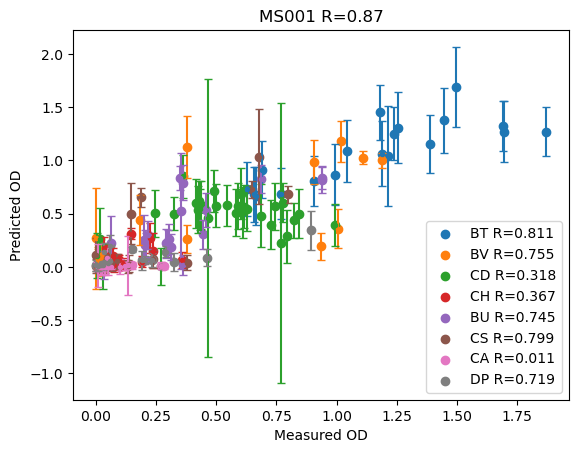

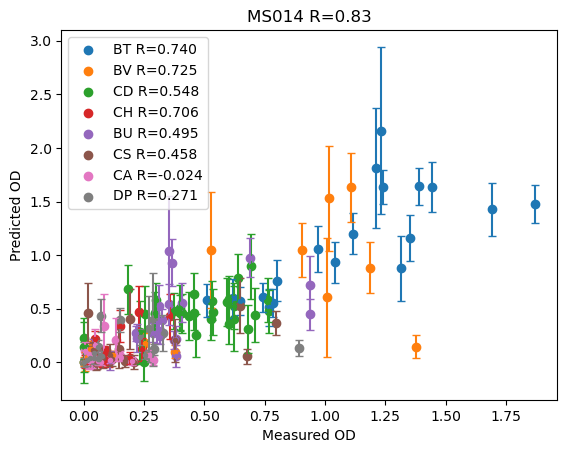

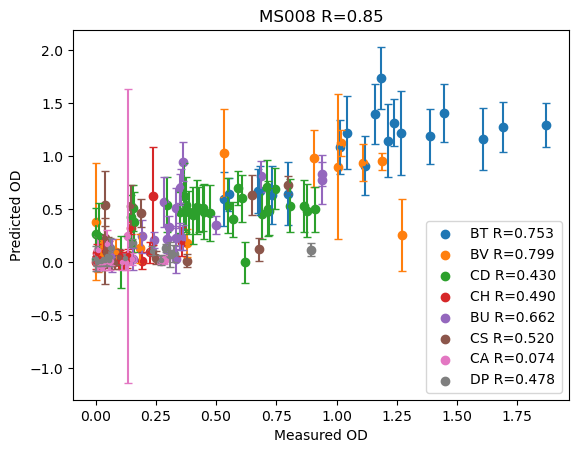

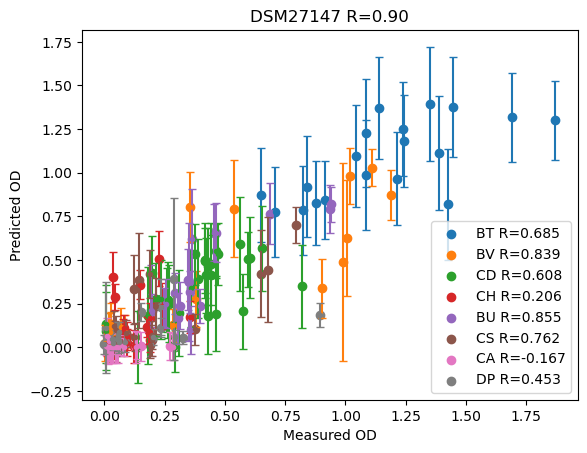

In [6]:
for file in files:
    strain = file.split("_")[1]
    kfold_df = pd.read_csv(f"kfold/{strain}_kfold_nsm.csv")
        
    all_pred_species = kfold_df['species'].values
    all_true = kfold_df['true'].values 
    all_pred = kfold_df['pred'].values
    all_stdv = kfold_df['stdv'].values
        
    R_overall = linregress(all_true, all_pred).rvalue
        
    # show prediction performance of individual species
    for sp in species:
        sp_inds = all_pred_species == sp
        R = linregress(all_true[sp_inds], all_pred[sp_inds]).rvalue
        plt.scatter(all_true[sp_inds], all_pred[sp_inds], label=f"{sp} " + "R={:.3f}".format(R))
        plt.errorbar(all_true[sp_inds], all_pred[sp_inds], yerr=all_stdv[sp_inds], 
                     fmt='.', capsize=3)

    plt.xlabel("Measured OD")
    plt.ylabel("Predicted OD")
    plt.legend()
    plt.title(strain + " R={:.2f}".format(R_overall))
    plt.show()

# Show example fit

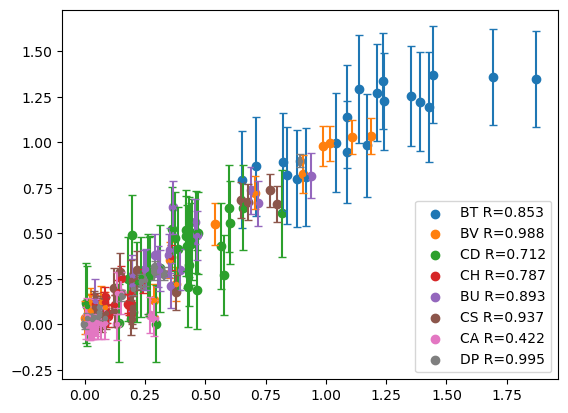

In [7]:
pred_species, true, pred, stdv = predict_df(model, train_df, species, inputs)

for sp in species:
    sp_inds = pred_species == sp
    if sum(true[sp_inds]) > 0:
        R = linregress(true[sp_inds], pred[sp_inds]).rvalue
        plt.scatter(true[sp_inds], pred[sp_inds], label=f"{sp} " + "R={:.3f}".format(R))
        plt.errorbar(true[sp_inds], pred[sp_inds], yerr= stdv[sp_inds], 
                     fmt='.', capsize=3)
plt.legend()
plt.show()